### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('Twitter-Absolute-Sigma-500.data', header=None)

### Data Inspect

In [2]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [3]:
#  Columns Names as per the description Provided

colnames = ["NCD","AI","AS(NA)","BL","NAC","AS(NAC)","CS","AT","NA","ADL","NAD","Buzz_0_or_1"]

# Function for Column name in the data set

def colrange(n):
    if n in range(0,7):
        return(colnames[0]+'_'+str(n-0))
    elif n in range(7,14) :
        return(colnames[1]+'_'+str(n-7))
    elif n in range(14,21) :
        return(colnames[2]+'_'+str(n-14))
    elif n in range(21,28) :
        return(colnames[3]+'_'+str(n-21))
    elif n in range(28,35) :
        return(colnames[4]+'_'+str(n-28))
    elif n in range(35,42) :
        return(colnames[5]+'_'+str(n-35))
    elif n in range(42,49) :
        return(colnames[6]+'_'+str(n-42))
    elif n in range(49,56) :
        return(colnames[7]+'_'+str(n-49))
    elif n in range(56,63) :
        return(colnames[8]+'_'+str(n-56))
    elif n in range(63,70) :
        return(colnames[9]+'_'+str(n-63))
    elif n in range(70,77) :
        return(colnames[10]+'_'+str(n-70))
    elif n==77 :
        return(colnames[11])    

# Renaming Columns name 
data.columns=[colrange(col) for col in data.columns]

In [4]:
data.shape

(140707, 78)

In [5]:
data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz_0_or_1
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0          140707 non-null int64
NCD_1          140707 non-null int64
NCD_2          140707 non-null int64
NCD_3          140707 non-null int64
NCD_4          140707 non-null int64
NCD_5          140707 non-null int64
NCD_6          140707 non-null int64
AI_0           140707 non-null int64
AI_1           140707 non-null int64
AI_2           140707 non-null int64
AI_3           140707 non-null int64
AI_4           140707 non-null int64
AI_5           140707 non-null int64
AI_6           140707 non-null int64
AS(NA)_0       140707 non-null float64
AS(NA)_1       140707 non-null float64
AS(NA)_2       140707 non-null float64
AS(NA)_3       140707 non-null float64
AS(NA)_4       140707 non-null float64
AS(NA)_5       140707 non-null float64
AS(NA)_6       140707 non-null float64
BL_0           140707 non-null float64
BL_1           140707 non-null float64
BL_2           14070

In [7]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz_0_or_1
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


### Data Leakage

In [8]:
# Determining the Correlation of Buzz_0_or_1 with other attributes.
co_matrix=data.corr()
co_matrix["Buzz_0_or_1"].sort_values(ascending=False)

  

Buzz_0_or_1    1.000000
AS(NA)_6       0.590686
AS(NA)_5       0.578038
NA_6           0.572527
NA_5           0.571965
AS(NA)_0       0.569938
NA_0           0.569730
AI_0           0.563515
AI_5           0.563084
AS(NA)_4       0.562928
AS(NAC)_6      0.560837
AS(NA)_3       0.557119
NA_1           0.556933
NA_4           0.555408
AI_6           0.552319
NAC_6          0.551673
AS(NA)_1       0.551450
NAC_5          0.549994
AS(NAC)_5      0.549422
NA_3           0.549304
NA_2           0.549267
NAC_0          0.548952
AS(NA)_2       0.547840
AI_4           0.546433
AI_1           0.545242
NAD_0          0.541199
NAD_6          0.541155
NCD_0          0.540735
NCD_6          0.540701
NAD_5          0.540574
                 ...   
AS(NAC)_2      0.513879
AS(NAC)_1      0.508425
BL_2           0.170248
CS_2           0.169339
BL_3           0.165275
CS_3           0.164040
BL_4           0.161463
BL_0           0.161292
CS_4           0.159971
CS_0           0.158734
BL_5           0

### Split Data

In [9]:
#  Defingin Target Variable & Independent Variables
X = data.iloc[:,:-1]
y = data.iloc[:,-1]


In [10]:
# Splitting Data set Randomly such that size is 10% of the original data 

from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [11]:
sample_data.shape

(14071, 77)

In [12]:
sample_target.shape

(14071,)

In [13]:
def Skewness(data):
    s = (data.mean(),data.median())
    s = pd.concat(s,axis=1)
    s.columns = ['mean','median']
    return(s)
Skewness(data)

,mean,median
NCD_0,172.279823,22.000000
NCD_1,155.150625,19.000000
NCD_2,165.464476,20.000000
NCD_3,176.820549,22.000000
NCD_4,186.937700,23.000000
NCD_5,216.209208,28.000000
NCD_6,243.866510,33.000000
AI_0,87.050154,13.000000
AI_1,78.639236,11.000000
AI_2,84.269574,13.000000


#### The use of scaling algorithm in the listed below methods will be Min Max Scalar Method
#### as the independent variables are not normally distributed and are Right Skewed as mean is towards the right of median
#### which we can see in the listed above table having 'Mean' and 'Median' values for all variables
#### so Standard Scaler will not work well 
#### and Min Max scalar Works well with such data set distribution as compared to Standard Scalar 


### Data Balance Check

In [14]:
y.sum()/y.count() ## Imbalanced 

0.19739600730596205

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### Model 1  : Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_lr = {'C':[0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2']}

log_reg = LogisticRegression()

grid_LogR = GridSearchCV(log_reg, param_grid = param_lr, cv = 5, scoring='roc_auc')
grid_LogR.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [17]:
print("Best cross-validation accuracy: {:.2f}".format(grid_LogR.best_score_))
print("Best parameters: {}".format(grid_LogR.best_params_))
print("Train Set Score: {:.2f}".format(grid_LogR.score(X_train, y_train)))
print("Test Set Score: {:.2f}".format(grid_LogR.score(X_test, y_test)))

Best cross-validation accuracy: 0.99
Best parameters: {'C': 1, 'penalty': 'l1'}
Train Set Score: 0.99
Test Set Score: 0.99


In [18]:
LogR_train_predict = grid_LogR.predict(X_train);
LogR_predict = grid_LogR.predict(X_test);

In [19]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(LogR_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(LogR_predict, y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.96 


In [20]:
cv_results = pd.DataFrame.from_dict(grid_LogR.cv_results_)
cv_results[['params','param_penalty','mean_train_score','mean_test_score']]

,params,param_penalty,mean_train_score,mean_test_score
0,"{'C': 0.01, 'penalty': 'l1'}",l1,0.500000,0.500000
1,"{'C': 0.01, 'penalty': 'l2'}",l2,0.965300,0.964919
2,"{'C': 0.1, 'penalty': 'l1'}",l1,0.988328,0.988192
3,"{'C': 0.1, 'penalty': 'l2'}",l2,0.988413,0.988238
4,"{'C': 1, 'penalty': 'l1'}",l1,0.991766,0.991550
5,"{'C': 1, 'penalty': 'l2'}",l2,0.989853,0.989730
6,"{'C': 10, 'penalty': 'l1'}",l1,0.992083,0.991334
7,"{'C': 10, 'penalty': 'l2'}",l2,0.991045,0.990823
8,"{'C': 100, 'penalty': 'l1'}",l1,0.992314,0.990757
9,"{'C': 100, 'penalty': 'l2'}",l2,0.991981,0.991535


In [21]:
x_axis = param_lr['C']
l1_trn = cv_results[cv_results['param_penalty']=='l1']['mean_train_score']
l1_tst = cv_results[cv_results['param_penalty']=='l1']['mean_test_score']
l2_trn = cv_results[cv_results['param_penalty']=='l2']['mean_train_score']
l2_tst = cv_results[cv_results['param_penalty']=='l2']['mean_test_score']


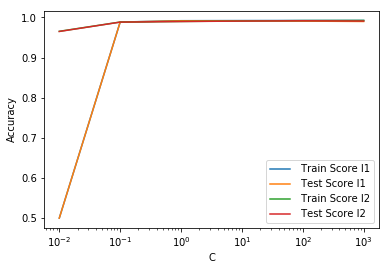

In [22]:
%matplotlib inline
plt.plot(x_axis, l1_trn , label = ' Train Score l1')
plt.plot(x_axis, l1_tst , label = ' Test Score l1')
plt.plot(x_axis, l2_trn , label = ' Train Score l2')
plt.plot(x_axis, l2_tst , label = ' Test Score l2')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.legend()


In [23]:
report_table = [['Logistic', grid_LogR.best_params_, grid_LogR.score(X_train, y_train), grid_LogR.score(X_test, y_test), roc_auc_score(LogR_train_predict, y_train), roc_auc_score(LogR_predict, y_test)]]

### Model 2 : KNN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier()
param_Knn = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_Knn = GridSearchCV(Knn, param_grid=param_Knn, cv = 5, scoring='roc_auc')
grid_Knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [25]:
print("Best cross-validation accuracy: {:.2f}".format(grid_Knn.best_score_))
print("Best parameters: {}".format(grid_Knn.best_params_))
print("Train Set Score: {:.2f}".format(grid_Knn.score(X_train, y_train)))
print("Test Set Score: {:.2f}".format(grid_Knn.score(X_test, y_test)))

Best cross-validation accuracy: 0.99
Best parameters: {'n_neighbors': 20}
Train Set Score: 0.99
Test Set Score: 0.98


In [26]:
Knn_train_predict = grid_Knn.predict(X_train);
Knn_predict = grid_Knn.predict(X_test);
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(Knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(Knn_predict, y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.96 


In [27]:
cv_results = pd.DataFrame.from_dict(grid_Knn.cv_results_)
cv_results[['params','mean_train_score','mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'n_neighbors': 1},1.000000,0.917677
1,{'n_neighbors': 5},0.995587,0.971067
2,{'n_neighbors': 10},0.994096,0.979748
3,{'n_neighbors': 15},0.993327,0.982965
4,{'n_neighbors': 20},0.992824,0.985095


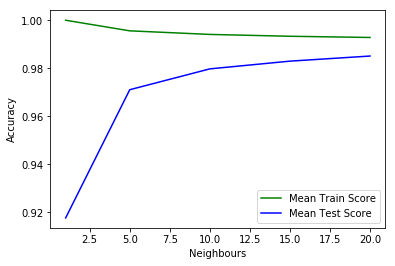

In [28]:
x_axis = cv_results['param_n_neighbors']
%matplotlib inline
plt.plot(x_axis, cv_results['mean_train_score'], label = 'Mean Train Score', c = 'g')
plt.plot(x_axis, cv_results['mean_test_score'], label = 'Mean Test Score', c='b')
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
plt.legend()

In [29]:
report_table = report_table+[['Knn Classifier', grid_Knn.best_params_, grid_Knn.score(X_train, y_train), grid_Knn.score(X_test, y_test), roc_auc_score(Knn_train_predict, y_train), roc_auc_score(Knn_predict, y_test) ]]

### Model 3 : Linear SVC

In [30]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
param_LSVC = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid for Linear SVC: {}".format(param_LSVC))

Parameter grid for Linear SVC: {'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [31]:
grid_LSVC = GridSearchCV(LSVC, param_grid=param_LSVC, cv = 5, scoring='roc_auc', return_train_score=True)
grid_LSVC.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [32]:
LSCV_predict_train = grid_LSVC.predict(X_train)
LSCV_predict = grid_LSVC.predict(X_test)

In [33]:
print("Best cross-validation accuracy: {:.2f}".format(grid_LSVC.best_score_))
print("Best parameters: {}".format(grid_LSVC.best_params_))
print("Train Set Score: {:.2f}".format(grid_LSVC.score(X_train, y_train)))
print("Test Set Score: {:.2f}".format(grid_LSVC.score(X_test, y_test)))

Best cross-validation accuracy: 0.99
Best parameters: {'C': 10}
Train Set Score: 0.99
Test Set Score: 0.99


In [34]:
report_table = report_table + [['Linear SVC', grid_LSVC.best_params_, grid_LSVC.score(X_train, y_train), grid_LSVC.score(X_test, y_test), roc_auc_score(LSCV_predict_train, y_train), roc_auc_score(LSCV_predict, y_test)]]

### Model 4 : SVM Kernel 'Linear'

In [35]:
from sklearn.svm import SVC, LinearSVC

svc_linear = SVC(kernel = 'linear') 
param_grid = {'C':[0.01, 0.1, 1, 10]}
print("Parameter grid for Linear SVM: {}".format(param_grid))



Parameter grid for Linear SVM: {'C': [0.01, 0.1, 1, 10]}


In [36]:
grid_svcLinear = GridSearchCV(svc_linear, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='roc_auc')
grid_svcLinear.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [37]:
cv_results = pd.DataFrame.from_dict(grid_svcLinear.cv_results_)
cv_results[['params','mean_train_score','mean_test_score']]


,params,mean_train_score,mean_test_score
0,{'C': 0.01},0.989733,0.989670
1,{'C': 0.1},0.989784,0.989705
2,{'C': 1},0.989896,0.989680
3,{'C': 10},0.990924,0.990549


In [38]:
print("Best cross-validation score: {:.2f}".format(grid_svcLinear.best_score_))
print('Best penalty term:',grid_svcLinear.best_params_)
print("Training Score: {:.2f}".format(grid_svcLinear.score(X_train, y_train)))
print("Testing Score: {:.2f}".format(grid_svcLinear.score(X_test, y_test)))

Best cross-validation score: 0.99
Best penalty term: {'C': 10}
Training Score: 0.99
Testing Score: 0.99


In [39]:
svcLinear_predict_train = grid_svcLinear.predict(X_train);
svcLinear_predict = grid_svcLinear.predict(X_test);

In [40]:
report_table = report_table + [['SVC Linear Kernalized', 'C = 10', grid_svcLinear.score(X_train, y_train), grid_svcLinear.score(X_test, y_test), roc_auc_score(svcLinear_predict_train, y_train), roc_auc_score(svcLinear_predict, y_test)]]

### Model 5 : SVM Kernel RBF

In [41]:
svc_rbf = SVC(kernel = 'rbf') 
param_grid = {'C':[0.01, 0.1, 1, 10], 'gamma':[0.01,0.1,1,10]}
print("Parameter grid for Linear SVR: {}".format(param_grid))

grid_svcRbf = GridSearchCV(svc_rbf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='roc_auc')

Parameter grid for Linear SVR: {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}


In [42]:
grid_svcRbf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [43]:
print("Best cross-validation score: {:.2f}".format(grid_svcRbf.best_score_))
print('Best parameters term:',grid_svcRbf.best_params_)
print("Training Score: {:.4f}".format(grid_svcRbf.score(X_train, y_train)))
print("Testing Score: {:.4f}".format(grid_svcRbf.score(X_test, y_test)))

Best cross-validation score: 0.99
Best parameters term: {'C': 1, 'gamma': 0.01}
Training Score: 0.9897
Testing Score: 0.9902


In [44]:
y_svcRbf_predict_train = grid_svcRbf.predict(X_train)
y_svcRbf_predict = grid_svcRbf.predict(X_test)


In [45]:
report_table = report_table + [['SVC RBF Kernalized', 'C = 10, Gamma = 0.01', grid_svcRbf.score(X_train, y_train), grid_svcRbf.score(X_test, y_test), roc_auc_score(y_svcRbf_predict_train, y_train), roc_auc_score(y_svcRbf_predict, y_test)]]

### Model 6 : Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth':[1, 2, 3, 4, 5, 6]}
dtree = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtree, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [47]:
dtree_predict_train = grid_tree.predict(X_train);
dtree_predict = grid_tree.predict(X_test);

In [48]:
report_table = report_table + [['Decision Tree', 'max_depth = 4', grid_tree.score(X_train, y_train), grid_tree.score(X_test, y_test), roc_auc_score(dtree_predict_train, y_train), roc_auc_score(dtree_predict, y_test)]]

### Model  7 : SVC Poly

In [49]:
svc_poly = SVC(degree = 2) 
param_grid = {'C':[0.01, 0.1, 1, 10]}

grid_svcPoly = GridSearchCV(svc_poly, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='roc_auc')
grid_svcPoly.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [50]:
cv_results = pd.DataFrame.from_dict(grid_svcPoly.cv_results_)
cv_results[['param_C','mean_train_score','mean_test_score']]

,param_C,mean_train_score,mean_test_score
0,0.01,0.989685,0.989598
1,0.1,0.989659,0.989565
2,1,0.989686,0.989602
3,10,0.989657,0.989530


In [51]:
y_svcPoly_predict_train = grid_svcPoly.predict(X_train);
y_svcPoly_predict = grid_svcPoly.predict(X_test);

In [52]:
report_table = report_table + [['SVC Poly', 'C = 10', grid_svcPoly.score(X_train, y_train), grid_svcPoly.score(X_test, y_test), roc_auc_score(y_svcPoly_predict_train, y_train), roc_auc_score(y_svcPoly_predict, y_test)]]

In [53]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])

In [54]:
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,Logistic,"{'C': 1, 'penalty': 'l1'}",0.991820,0.992042,0.958405,0.960931
1,Knn Classifier,{'n_neighbors': 20},0.992917,0.984436,0.952572,0.959137
2,Linear SVC,{'C': 10},0.991834,0.991533,0.959273,0.962106
3,SVC Linear Kernalized,C = 10,0.990854,0.990084,0.956296,0.961399
4,SVC RBF Kernalized,"C = 10, Gamma = 0.01",0.989687,0.990154,0.936043,0.938574
5,Decision Tree,max_depth = 4,0.984024,0.979594,0.957918,0.956487
6,SVC Poly,C = 10,0.989688,0.990110,0.939706,0.940465


### Linear SVC is More accurate

In [55]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train_whole = scaler.fit_transform(X_train_org)
X_test_whole = scaler.transform(X_test_org)

In [56]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)

In [57]:
grid_svc_lin.fit(X_train_whole, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [58]:
y_svc_lin_predict_train = grid_svc_lin.predict(X_train_whole)
y_svc_lin_predict = grid_svc_lin.predict(X_test_whole)

In [59]:
report_table_final = [['LinearSVC', 'C = 10', grid_svc_lin.score(X_train_whole, y_train), grid_svc_lin.score(X_test_whole, y_test), roc_auc_score(y_svc_lin_predict_train, y_train), roc_auc_score(y_svc_lin_predict, y_test)]]

In [60]:
report_final = pd.DataFrame(report_table_final,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])

In [61]:
report_final

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,LinearSVC,C = 10,0.991642,0.99137,0.958477,0.957015
